# Day 6: Introduction to Python

### by Justin B. Kinney

Today's tutorial will focus on useful python resources, including **seaborn, scipy, biopython, and scikit-learn**

In [1]:
# Always put this first
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To run today's code, you will need to install two packages: seaborn and biopython. Do this at the shell (not python) command line:
```
$ conda install seaborn
$ conda install biopython
```

## Seaborn

The seaborn module, described here, https://stanford.edu/~mwaskom/software/seaborn/, provides very convenient plotting functionality. If nothing else, it will make your plots look nicer. 

In [2]:
# This is the convention for importing seaborn
import seaborn as sns

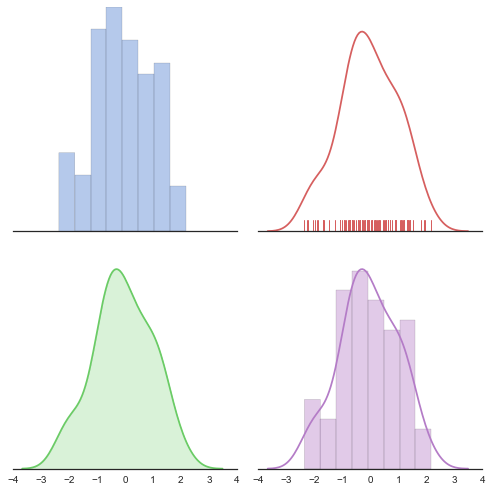

In [6]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = np.random.randn(100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [10]:
# Load dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


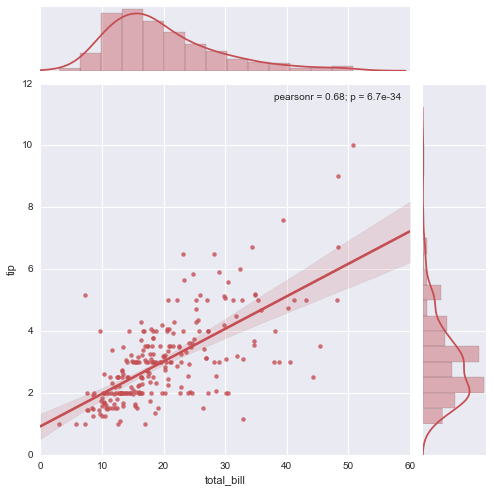

In [7]:
# Joint plot
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

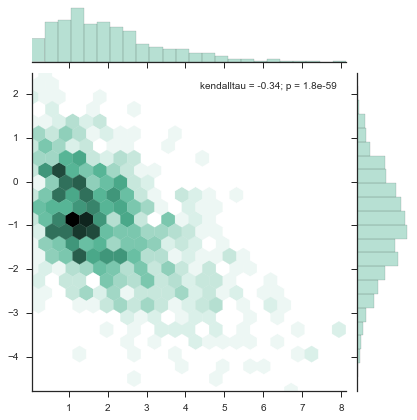

In [11]:
from scipy.stats import kendalltau
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

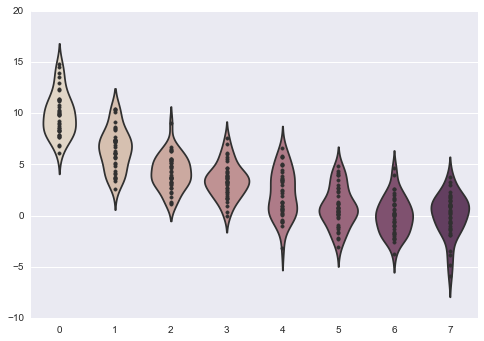

In [13]:
# Violin plot
sns.set()

# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=+.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="points")

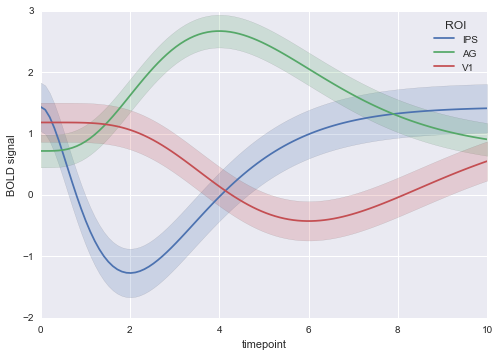

In [14]:
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal")

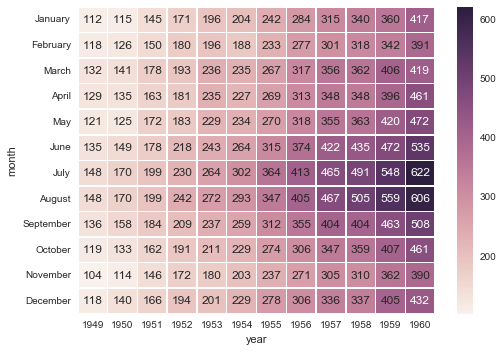

In [15]:
# Heatmap
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

## Scipy

Scipy (https://www.scipy.org/) is the primary scientific python toolkit. There is lots of useful math stuff in here. 

$$ I(a,b) = \int_0^1 dx \left( ax^2 + b \right) $$

In [17]:
# Integration
from scipy.integrate import quad
def integrand(x, a, b):
    return a * x**2 + b
a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
print I

(1.6666666666666667, 1.8503717077085944e-14)


$$ I(n,x) = \int_1^\infty dt \frac{e^{-xt}}{t^n} $$

In [18]:
# Integration over an infinite bound
def integrand(t, n, x):
    return np.exp(-x*t) / t**n
n = 5
x = 4
I = quad(integrand, 1, np.inf, args=(n, x))[0]
print I

0.00215551135353


We want to solve the second-order Oridnary Differential Equation (ODE),

$$ \theta''(t) + b*\theta'(t) + c*\sin(\theta(t)) = 0 $$

We do this by changing to a systems of multiple first-order ODEs:

$$ \theta'(t) = \omega(t) $$
$$ \omega'(t) = -b*\omega(t) - c*\sin(\theta(t)) $$

Systems of first-order ODEs like this can readilty be solved using scipy.integrate.odeint

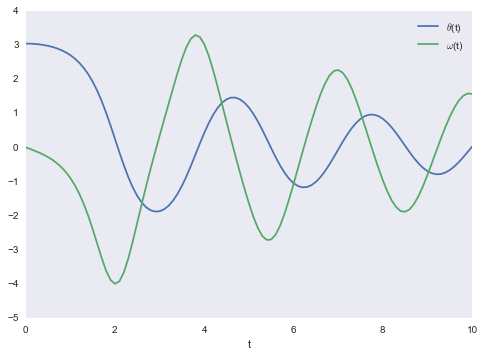

In [19]:
from scipy.integrate import odeint

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Scipy also contains many extremely useful statistical functions

In [20]:
from scipy import stats
from scipy.stats import norm

# Draw random numbers from a normal distribution
norm.rvs(size=10)

array([-0.88555444, -0.86308642,  1.19030459,  0.6850036 , -0.54692305,
        0.51762776, -0.88584114, -0.12811949,  0.82482879, -0.00779948])

In [21]:
# Get mean, variance, skew, kurotsis
norm.stats(moments='mvsk')

(array(0.0), array(1.0), array(0.0), array(0.0))

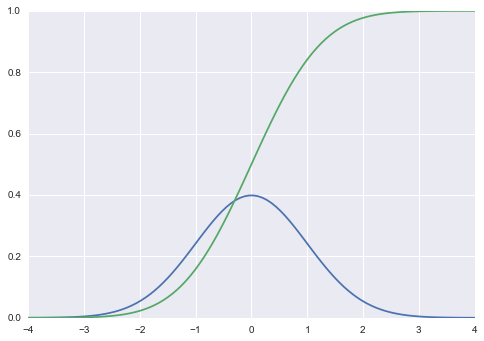

In [22]:
# Get cumulative distribution function
x = np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x))
plt.plot(x,norm.cdf(x))

## Biopython

Biopython provides routines for dealing with DNA sequence and performing other bioinformatics computations. The official website is http://biopython.org/wiki/Biopython. Biopython can be insalled by doing this at the command line:

```
$ conda install Biopython
```

In [23]:
# Create a DNA sequence
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
my_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", generic_dna)
my_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG', DNAAlphabet())

In [24]:
# Reverse-complement DNA
rc_dna = my_dna.reverse_complement()
rc_dna

Seq('CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT', DNAAlphabet())

In [25]:
# Transcribe DNA to RNA
my_rna = my_dna.transcribe()
my_rna

Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG', RNAAlphabet())

In [26]:
# Translate protein
bad_protein = my_rna.translate()
bad_protein

Seq('MAIVMGR*KGAR*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [27]:
# Translate using a different codon table
good_protein = my_rna.translate(table="Vertebrate Mitochondrial")
good_protein

Seq('MAIVMGRWKGAR*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [28]:
# Look at m_cold.fasta
!cat m_cold.fasta

>gi|8332116|gb|BE037100.1|BE037100 MP14H09 MP Mesembryanthemum crystallinum cDNA 5' similar to cold acclimation protein, mRNA sequence
CACTAGTACTCGAGCGTNCTGCACCAATTCGGCACGAGCAAGTGACTACGTTNTGTGAACAGAAAATGGG
GAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGATATC
AATGAGCTTAAAATGGCAACAATGAGGCTCATCAATGATGCTAGTATGCTCGGTCATTACGGGTTTGGCA
CTCATTTCCTCAAATGGCTCGCCTGCCTTGCGGCTATTTACTTGTTGATATTGGATCGAACAAACTGGAG
AACCAACATGCTCACGTCACTTTTAGTCCCTTACATATTCCTCAGTCTTCCATCCGGGCCATTTCATCTG
TTCAGAGGCGAGGTCGGGAAATGGATTGCCATCATTGCAGTCGTGTTAAGGCTGTTCTTCAACCGGCATT
TCCCAGTTTGGCTGGAAATGCCTGGATCGTTGATACTCCTCCTGGTGGTGGCACCAGACTTCTTTACACA
CAAAGTGAAGGAGAGCTGGATCGGAATTGCAATTATGATAGCGATAGGGTGTCACCTGATGCAAGAACAT
ATCAGAGCCACTGGTGGCTTTTGGAATTCCTTCACACAGAGCCACGGAACTTTTAACACAATTGGGCTTA
TCCTTCTACTGGCTTACCCTGTCTGTTTATGGTCATCTTCATGATGTAGTAGCTTAGTCTTGATCCTAAT
CCTCAAATNTACTTTTCCAGCTCTTTCGACGCTCTTGCTAAAGCCCATTCAATTCGCCCCATATTTCGCA
CACATTCATTTCACCACCCAATACGTGCTCTCCTTCTCCCTCTCTCCCTCTCCTCCCTCTTTTCTTCCTC
TCACTTCTCTTCT

In [29]:
# Read data from FASTA file
from Bio import SeqIO
record = SeqIO.read("m_cold.fasta", format="fasta")
print record

ID: gi|8332116|gb|BE037100.1|BE037100
Name: gi|8332116|gb|BE037100.1|BE037100
Description: gi|8332116|gb|BE037100.1|BE037100 MP14H09 MP Mesembryanthemum crystallinum cDNA 5' similar to cold acclimation protein, mRNA sequence
Number of features: 0
Seq('CACTAGTACTCGAGCGTNCTGCACCAATTCGGCACGAGCAAGTGACTACGTTNT...TTC', SingleLetterAlphabet())


In [34]:
# Extract DNA sequence from record
record.seq

Seq('CACTAGTACTCGAGCGTNCTGCACCAATTCGGCACGAGCAAGTGACTACGTTNT...TTC', SingleLetterAlphabet())

In [35]:
# Run BLAST on sequence over the internet [takes a minute or so]
# Results are returned as XML
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)

In [36]:
# Save BLAST results
save_file = open("my_blast.xml", "w")
save_file.write(result_handle.read())
save_file.close()
result_handle.close()

In [37]:
# Peak at BLAST output
!head my_blast.xml

<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastn</BlastOutput_program>
  <BlastOutput_version>BLASTN 2.4.0+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_97863</BlastOutput_query-ID>
  <BlastOutput_query-def>No definition line</BlastOutput_query-def>
  <BlastOutput_query-len>1111</BlastOutput_query-len>


## scikit-learn

scikit-learn is the premeir machine learning module for python. The package and documentation can be found here: http://scikit-learn.org/stable/index.html. This module comes pre-installed in the Anaconda distribution.

### Classification of handwritten numbers

In [38]:
"""
================================
Recognizing hand-written digits
================================

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.

"""
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

print digits.keys()


Recognizing hand-written digits

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.


['images', 'data', 'target_names', 'DESCR', 'target']


target =  0


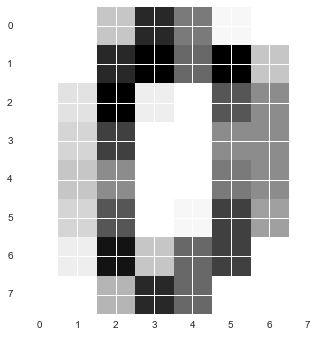

In [40]:
# Print one of the images
image = digits['images'][0]
target = digits['target'][0]
plt.imshow(digits['images'][0], interpolation='nearest')
print 'target = ', target

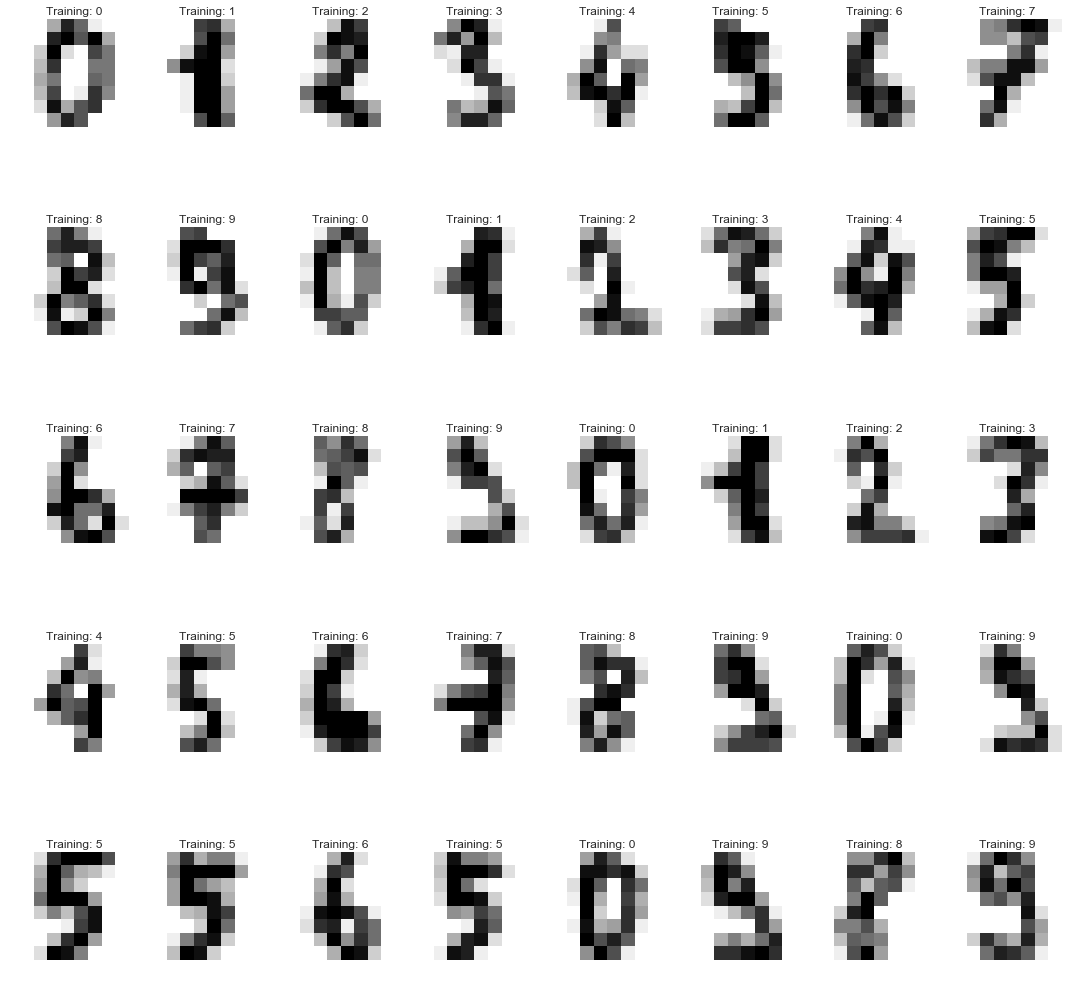

In [41]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
plt.figure(figsize=[15,15])
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(5, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

plt.tight_layout()
plt.show()

In [42]:
# How large is the training data? 
n_samples = len(digits.images)
print n_samples

1797


In [43]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

#### This is where we fit the classifier: ###
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

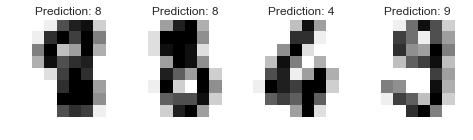

In [44]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



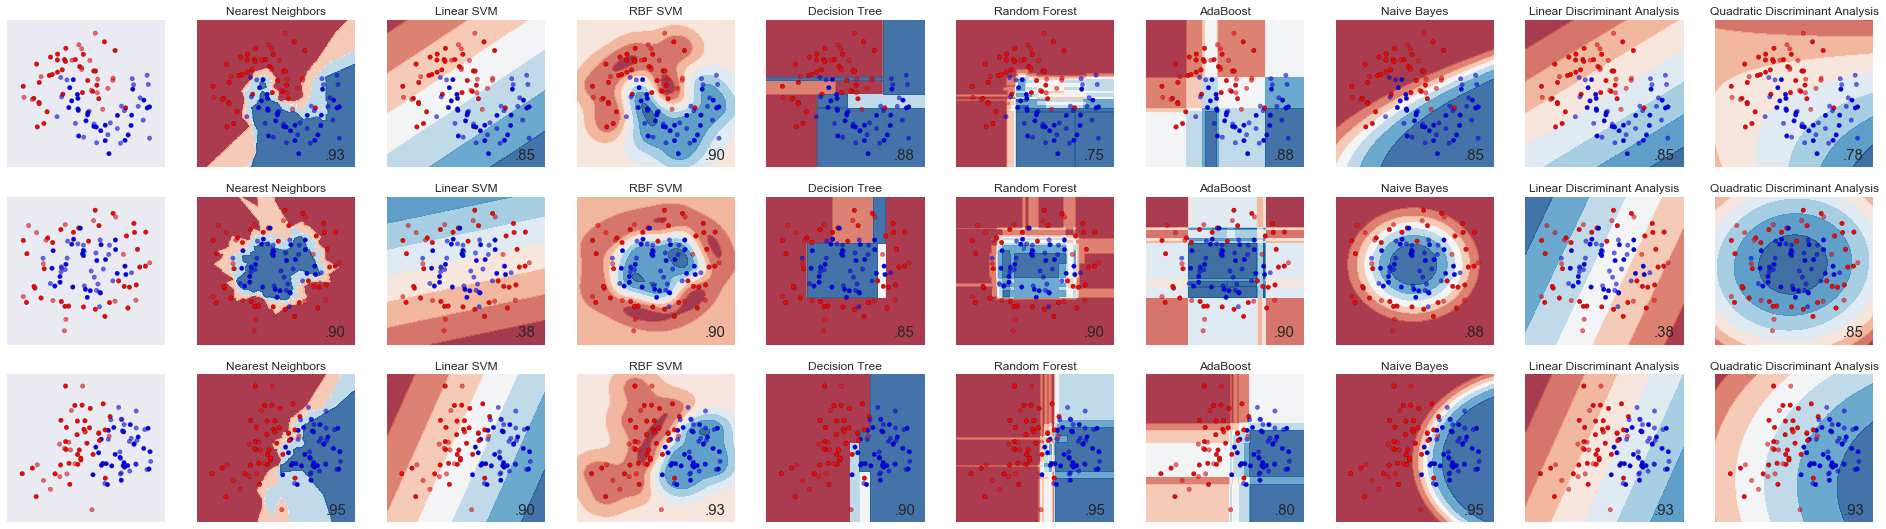

In [45]:
"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [ ]:
!rm *.xml